In [1]:
import numpy as np
from coloredMNIST import ColoredMNIST
from cnn_utils import Conv3x3, MaxPool2x2, Softmax, trainNetwork
import matplotlib.pyplot as plt
from absl import logging as logger

# Initialise logging globally
logger.set_verbosity('info')
logger.set_stderrthreshold('info')

## Data Preparation

In [2]:
coloredmnist = ColoredMNIST()

INFO:absl:Preparing Colored MNIST
INFO:absl:shape of resized image: (64, 64, 1)
INFO:absl:Start overwirting cropped base image
INFO:absl:Shape of ColoredMNIST training set: (5000, 64, 64, 3)
INFO:absl:Shape of ColoredMNIST test set: (500, 64, 64, 3)


In [12]:
(x_train, y_train), (x_test, y_test) = coloredmnist.load_data()

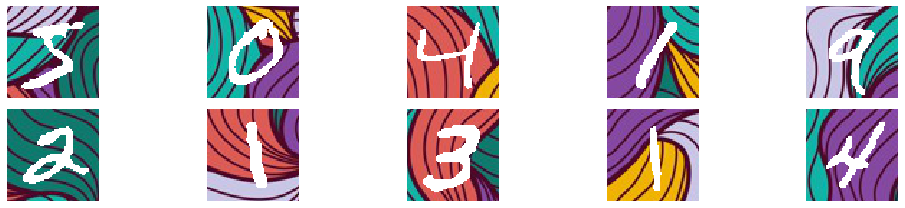

In [4]:
count = 10

plt.figure(figsize=(15,3))
for i in range(count):
    plt.subplot(2, count // 2, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## Instanciate CNN

In [13]:
conv_layer = Conv3x3(8)
maxpool = MaxPool2x2()
softmax = Softmax(8192, 10)

## Train CNN on Colored MNIST

In [14]:
cnn_model = trainNetwork(conv_layer, maxpool, softmax)

In [20]:
# Initialisation 
lr = 0.005
num_class = 10 
num_epoch = 3

for epoch in range(num_epoch):
    
    loss = 0 
    num_correct = 0 
    
    print(f"--Start epoch {epoch}--")
    
    # Shuffle the training data 
    shuffle_index = np.random.permutation(len(x_train))
    x_train_shuffle = x_train[shuffle_index]
    y_train_shuffle = y_train[shuffle_index]
    
    for i, (image, label) in enumerate(zip(x_train_shuffle, y_train_shuffle), 1):

        if i % 100 == 0:

            print(f"{i} Steps: Average Loss {loss/i} | Accuracy {num_correct / i * 100}%")

        l, acc = cnn_model.train(image, label, lr, num_class)

        loss += l

        num_correct += acc 

--Start epoch 0--
100 Steps: Average Loss 1.5913475559583141 | Accuracy 47.0%
200 Steps: Average Loss 1.3722268809974654 | Accuracy 54.0%
300 Steps: Average Loss 1.2758600349260178 | Accuracy 59.66666666666667%
400 Steps: Average Loss 1.2240841311129962 | Accuracy 62.5%
500 Steps: Average Loss 1.1351176461630086 | Accuracy 65.8%
600 Steps: Average Loss 1.1013654296773514 | Accuracy 67.16666666666666%
700 Steps: Average Loss 1.0632543554888845 | Accuracy 68.14285714285714%
800 Steps: Average Loss 1.0554526479813686 | Accuracy 68.375%
900 Steps: Average Loss 1.0560017149418726 | Accuracy 69.11111111111111%
1000 Steps: Average Loss 1.0283890566351004 | Accuracy 69.89999999999999%
1100 Steps: Average Loss 1.0126742402848552 | Accuracy 70.0%
1200 Steps: Average Loss 1.00787912711745 | Accuracy 70.66666666666667%
1300 Steps: Average Loss 1.0004126389643815 | Accuracy 70.92307692307692%
1400 Steps: Average Loss 0.97568909119629 | Accuracy 71.71428571428572%
1500 Steps: Average Loss 0.94913052

KeyboardInterrupt: 